In [15]:
import pandas as pd

data = pd.read_json("/content/drive/MyDrive/ColabData/dict_dataset_full.json")

In [5]:
data.head()

,corner,position,set_id,set_name
0,"[[85, 80, 80, 80, 80, 79, 79, 79, 79, 68, 68, ...",left,no,no
1,"[[190, 190, 190, 190, 190, 190, 190, 190, 190,...",right,dv1,Dragon Vault
2,"[[85, 80, 80, 80, 80, 79, 79, 79, 79, 68, 68, ...",left,no,no
3,"[[190, 190, 190, 190, 190, 190, 190, 190, 190,...",right,dv1,Dragon Vault
4,"[[85, 80, 80, 80, 80, 79, 79, 79, 79, 68, 68, ...",left,no,no


In [16]:
data['corner']

0       [[85, 80, 80, 80, 80, 79, 79, 79, 79, 68, 68, ...
1       [[190, 190, 190, 190, 190, 190, 190, 190, 190,...
2       [[85, 80, 80, 80, 80, 79, 79, 79, 79, 68, 68, ...
3       [[190, 190, 190, 190, 190, 190, 190, 190, 190,...
4       [[85, 80, 80, 80, 80, 79, 79, 79, 79, 68, 68, ...
                              ...                        
4775    [[154, 154, 154, 154, 154, 154, 154, 154, 154,...
4776    [[150, 149, 161, 161, 161, 166, 166, 166, 166,...
4777    [[154, 154, 154, 154, 154, 154, 154, 154, 154,...
4778    [[86, 113, 113, 113, 73, 34, 113, 113, 113, 11...
4779    [[154, 154, 154, 154, 154, 154, 154, 154, 154,...
Name: corner, Length: 4780, dtype: object

In [30]:
img = data.iloc[4000]['corner']


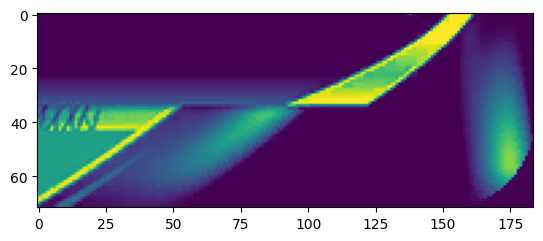

In [31]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [17]:
X = data.drop(['set_id'], axis=1)
y = data['set_id']

In [18]:
X.shape, y.shape

((4780, 3), (4780,))

In [20]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Path to your dataset
categories = ['class1', 'class2', 'class3']  # Replace with your actual class names

# Shuffle data
import random
random.shuffle(data)

# Separate features and labels
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

# Convert to numpy arrays and normalize
X = np.array(X).reshape(-1, 72, 184, 1).astype('float32') / 255.0  # Normalize pixel values
y = to_categorical(np.array(y))  # One-hot encode labels

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(72, 184, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# # Save the model
# model.save('multi_class_cnn.h5')

# Load and use the model for prediction
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    resized_array = cv2.resize(img_array, (72, 184))
    return resized_array.reshape(-1, 72, 184, 1).astype('float32') / 255.0

model = tf.keras.models.load_model('multi_class_cnn.h5')
image_path = 'path_to_new_image.png'
prediction = model.predict(prepare(image_path))
print(categories[np.argmax(prediction)])  # Print the predicted class


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).